### Описание приекта

Ниже мы проведем исследовательскую работу для интернет-магазина компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мы будем выявлять определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### План работы:
1. Подготовка данных
2. Исследовательский анализ данных
3. Портрет пользователя каждого региона
4. Проверка гипотез

### Шаг 1. Загрузка данных и изучение данные

#### Загружаем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as st
pd.set_option('display.max_columns', 50)

#### Загружаем файл с данными

In [2]:
pth = 'datasets/games.csv'
if os.path.exists(pth):
    data = pd.read_csv(pth, sep=',')
else:
    print('Something is wrong')

#### Изучаем данные

In [3]:
data.info()
print()    
display(data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что есть пропущенные значения. Названия столбцов не удовлетворяет правилам. Типы данных также нужно поправить.

### Шаг 2. Подготовка данных

#### 2.1. Исправление названий столбцов (приведение к нижнему регистру).

Как видим, названия столбцов не соответствует стандартам, поэтому исправляем:

In [4]:
data.columns = data.columns.str.lower()
display(data.head(10))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 2.2. Преобразование данных в нужные типы.

Итак, нам нужно поментяь типы данных в следующих столбцах: 
1. year_of_release на тип Date, так как в этом столбце у нас хранится год выпуска игры. 
2. user_score на тип float64, так как оценки у нас выражены в вещественных числах.

In [5]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format="%Y")
data['year_of_release'] = data['year_of_release'].dt.year

При изменении типа данных в столбце 'user_score' наткнулись на текстовый tbd, разберем его позже.

#### 2.3. Обработка пропусков

Посмтрим количество пропусков, но сначала выведем информацию о количестве строк и столбцов в таблице.

In [6]:
print('В таблице', data.shape[0], 'строк и', data.shape[1], 'столбцов')

В таблице 16715 строк и 11 столбцов


Количество пропусков:

In [7]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Процент пропусков:

In [8]:
print(data.isnull().sum() / data.shape[0] * 100)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


2 пропуска в столбце с именем, удалим эти строки.<br>
1.6% пропусков в данных года релиза, также можно этими данными принебречь.<br>
2 пропуска в жанре, удалим эти строки.<br>
И существенное количество пропусков в данных critic_score, user_score и rating.

In [9]:
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
#print(data.isnull().sum())
display(data[data.isna().any(axis=1)].sort_values(by='year_of_release', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16443,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15881,Dead Rising,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,8.8,M
15844,Period Cube: Torikago no Amadeus,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7459,The Heavy Rain and Beyond: Two Souls Collection,PS4,2016.0,Action,0.00,0.17,0.00,0.03,NaN,NaN,NaN
13357,Refrain no Chika Meikyuu to Majo no Ryodan,PSV,2016.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Пропуски в рейтингах могут быть по нескольким причинам. Ну во-первых, игру выпущенные в 80-х и 90-х годах врядли подвергались оценкам критиков и пользователей, потому что в то время даже интренет не был распространен и никаких систем оценок не существовало. Во-вторых, продажи игр, вышедших в 2016 году, еще не достигли того уровня, при которм можно получить более или менее достоверную оценку.

##### Возвращаемся к аббревиатуре 'tbd' в столбце с оценкой пользователей.

Рейтинг Tbd (To be determined) игр — это система оценки и ранжирования видеоигр, которые еще находятся в разработке или вышли недавно и пока не имеют достаточного количества оценок и отзывов от игроков и критиков. Значит данных просто нет, а это как мы знаем NaN. Будет справедливо значение tbd изменить на NaN.


In [10]:
display(data.query('user_score == "tbd"').head(10))
data = data.replace('tbd', np.nan)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
716,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
810,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
870,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1036,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1037,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Теперь меняем тип данных в столбце с рейтиногм пользвателей

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Для того, чтобы мы могли производить операции с рейтнгом ESRB, его также нужно перевести float.<br>
Ознакомимся с обозначением рейтингов:<br>
1. «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
2. «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Первоначально "K-A" ("Kids to Adults")
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
4. «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
5. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
6. «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 
7. «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 
8. «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+».


Найдем все уникальные значений столбца rating

In [12]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


У нас нет RP 17+, но есть K-A, а это тоже самое что Е. Заменим все K-A на Е.

In [13]:
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'
list_rating = data['rating'].unique()
print(list_rating)

['E' nan 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


Каждое значение рейтинга присуще минимальному возрасту игроков. Поэтому вмест буквенных обозначений создадим столбец с минимальным возрастом, а именно:
1. «EC»   -> 3
2. «E»    -> 6
3. «E10+» -> 10
4. «T»    -> 13
5. «M»    -> 17
6. «AO»   -> 18 
7. «RP» -> Nan 

In [14]:
def rating(row):
    if row['rating'] == 'EC':
        return 3
    elif row['rating'] == 'E':
        return 6
    elif row['rating'] == 'E10+':
        return 10
    elif row['rating'] == 'T':
        return 13
    elif row['rating'] == 'M':
        return 17
    elif row['rating'] == 'AO':
        return 18
    else:
        return 'Undefined'

data['rating_esrb'] = data.apply(rating, axis=1)
data = data.replace('Undefined', np.nan)  

##### Проверим дубликаты

In [15]:
print('Повторяющихся строк в data:', data.duplicated().sum())

Повторяющихся строк в data: 0


##### Проверяем дубликаты по столбцам с именем, платформой и годом выпуска

In [16]:
print(data.duplicated(subset=['name', 'platform', 'year_of_release']).sum())

1


Удаляем этот дубликат

In [17]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')

Пропуски в данных оценок не поддаются исправлеию, так как нечем их заменить.

#### 2.4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,6.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,6.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.01


Итак, мы изучлили данные. В представленных данных имеются пропущенные значения. Названия столбцов и типы данных не удовлетворяет правилам. Где можно, исправили эти недочеты. Удалили дубликаты строк. Исправили значение tbd в рейтингах. Также посчитали общие по регионам продажи.

### Шаг 3. Исследовательский анализ данных

#### Анализ количества выпускаемых игр по годам.

На этом шаге посмотрим какое количество игр выпускалось в каждый год.

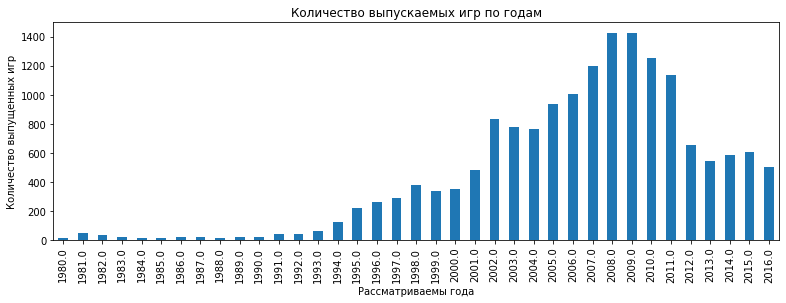

In [19]:
data.groupby(['year_of_release'])['name'].count().plot(kind='bar', figsize=(13,4))
plt.title('Количество выпускаемых игр по годам')
plt.xlabel("Рассматриваемы года")
plt.ylabel("Количество выпущенных игр")
None

Видим, что до 1994 года и ста игр не выходило. Этими данными логично принеберечь. 

In [20]:
data = data.query('year_of_release > 1993')

#### Посмотрим, как менялись продажи по платформам.

Посмотрим общие продажи по платформам

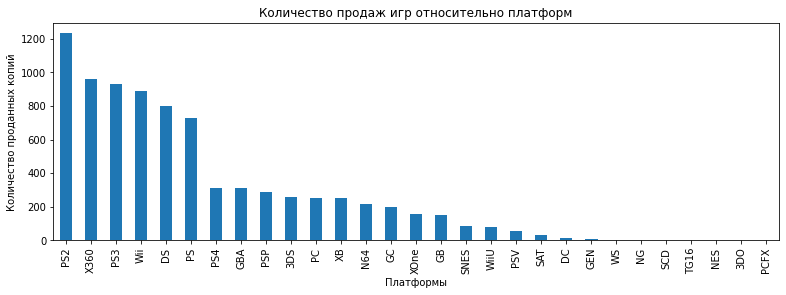

In [21]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(13,4))
plt.title('Количество продаж игр относительно платформ')
plt.xlabel("Платформы")
plt.ylabel("Количество проданных копий")
None

Имеем явных лидеров: PS2, X360, PS3, Wii, DS, PS. 

In [22]:
data_top_platform = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
data_top_platform.info()
print()
data_top_platform

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         197 non-null    object 
 1   year_of_release  197 non-null    float64
 2   total_sales      197 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB



,platform,year_of_release,total_sales
0,3DO,1994.0,0.02
1,3DO,1995.0,0.08
2,3DS,2011.0,63.20
3,3DS,2012.0,51.36
4,3DS,2013.0,56.57
...,...,...,...
192,XB,2008.0,0.18
193,XOne,2013.0,18.96
194,XOne,2014.0,54.07
195,XOne,2015.0,60.14


##### Построим для лидеров продаж графики сумарных продаж по году релиза

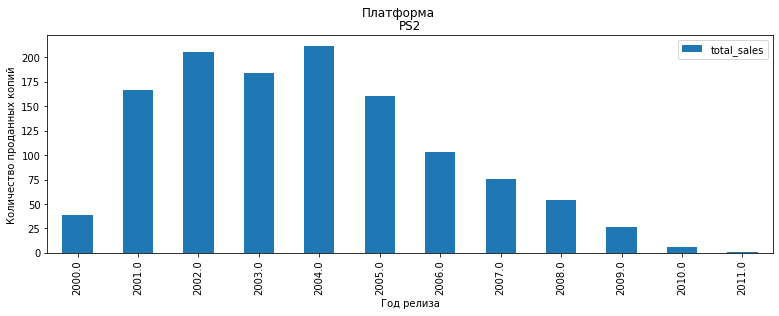

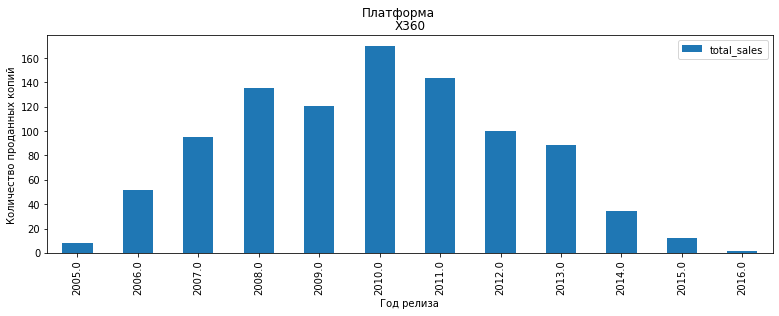

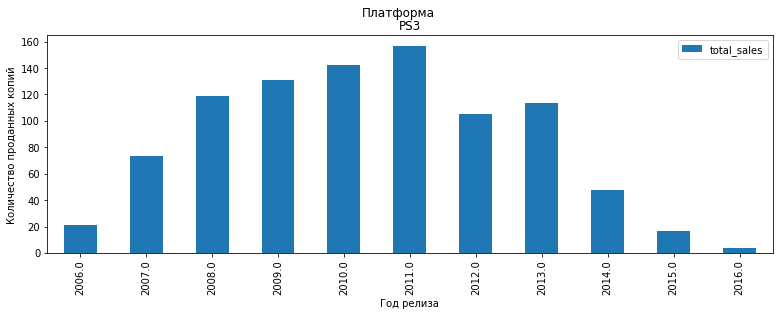

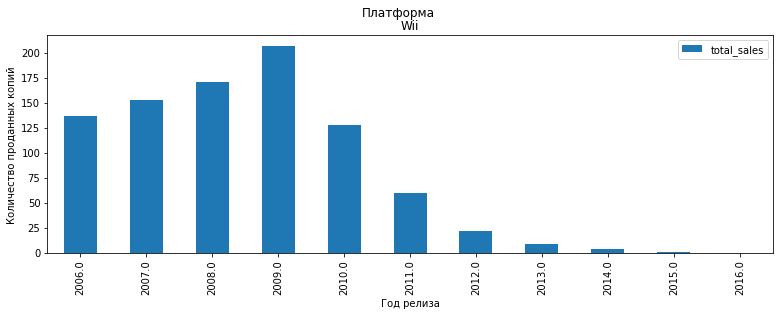

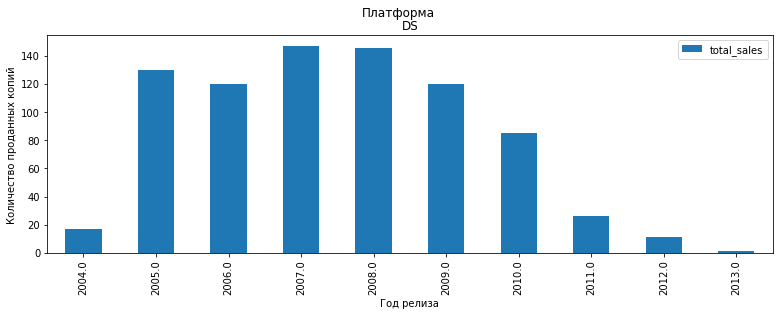

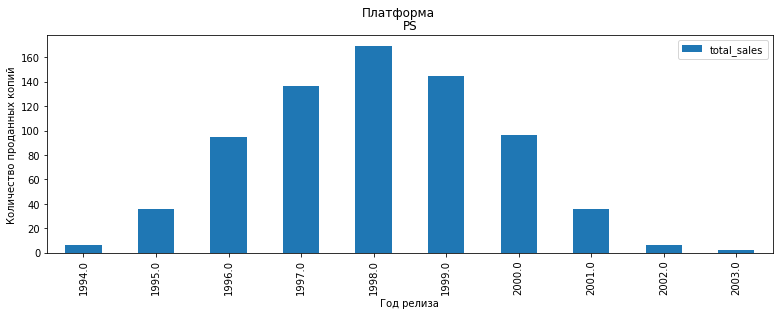

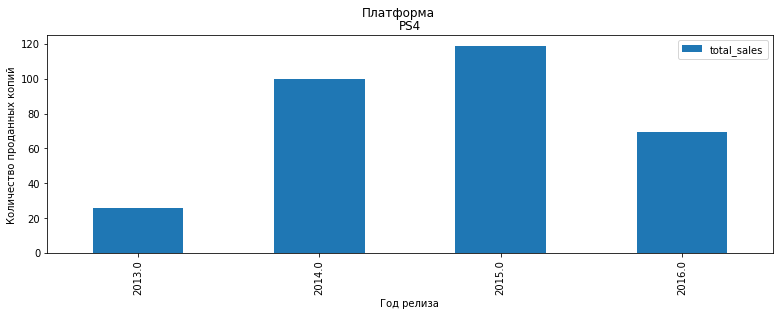

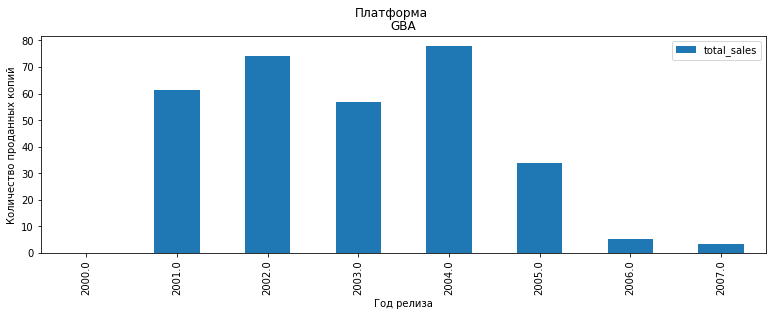

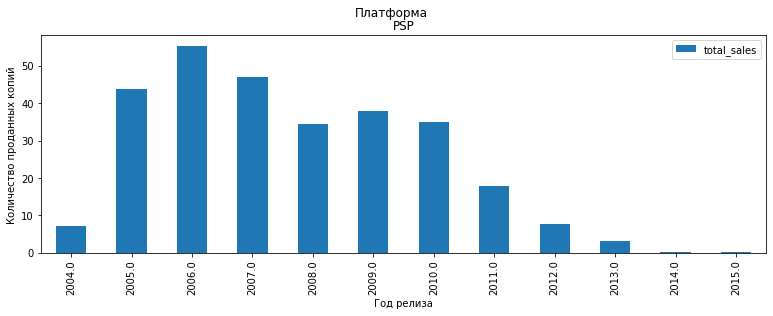

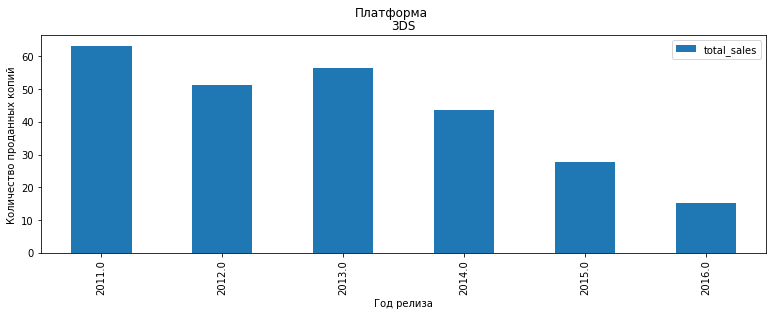

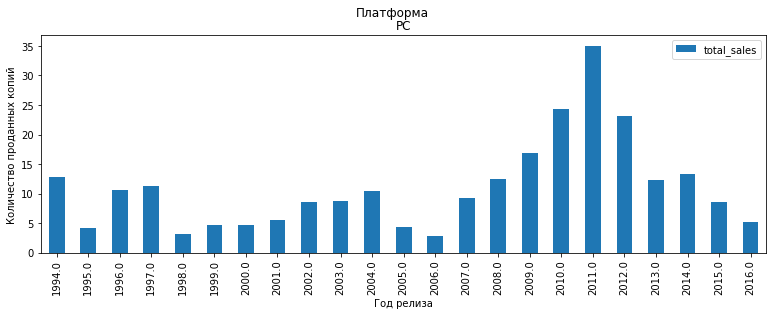

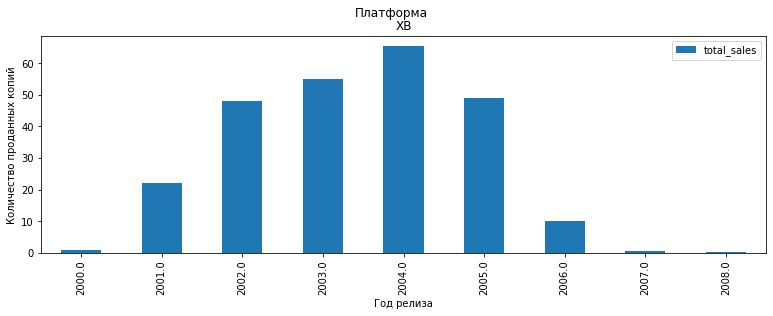

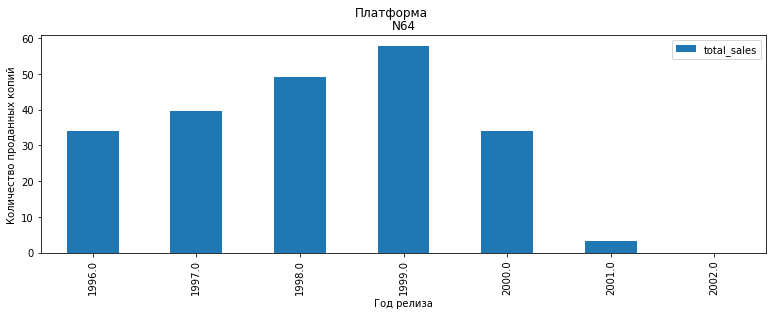

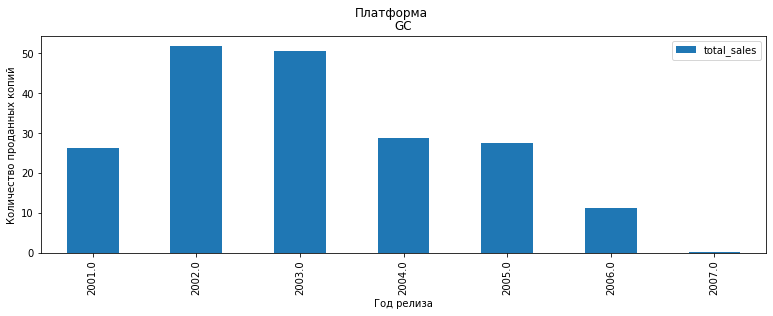

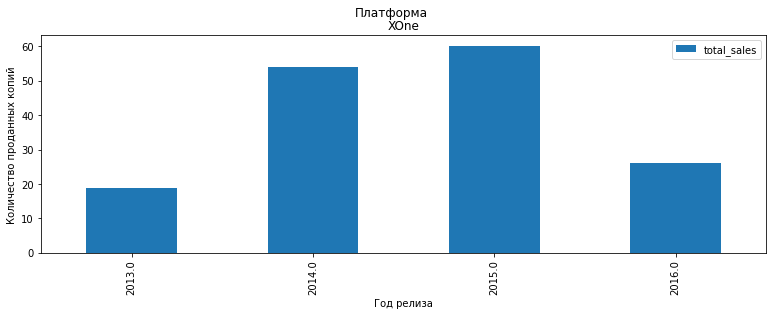

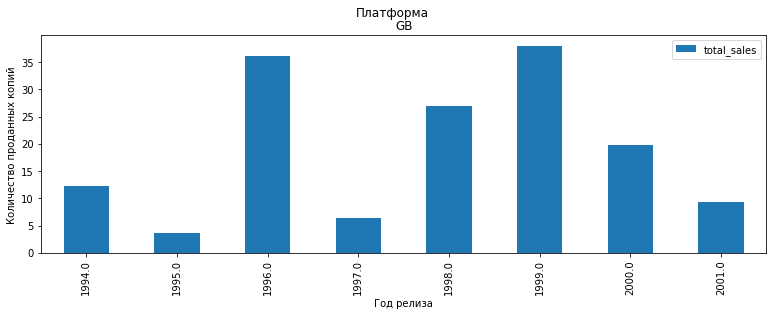

In [23]:
list_top_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:16]

for platf in list_top_platform:
    data_top_platform[data_top_platform['platform'] == platf].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
    plt.title(platf)
    plt.suptitle('Платформа')
    plt.xlabel('Год релиза')
    plt.ylabel('Количество проданных копий')
    None

По графикам видно, что большинство как и топ-6 сдют свои позиции в пользу ***PS4 и XOne*** , 2016 год рассматриваем как неполный. То есть выбирая платформы для развития стоит остановиться на PS4 и XOne. Но к ним еще добавил бы ***PC***, так как на настольных копьютерах играли, играют и будут играть, с них все и началось.<br>
Таже по графикам видим, что период для дальнейшего исследования мы можем взять ***с 2013 по 2015 год***. Слишком быстро все меняется в данной индустрии.<br>

In [24]:
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'].median()

6.0

Жизненный цикл консолей примерно равен 6 годам. Поэтому выбранный период и платформы дадут нам актуальную информацию.

#### Избавляемся от ненужных периодов и платформ.

In [25]:
data_year_correct = data.query('2013 <= year_of_release <= 2016').reset_index()

Посмотрим что у нас осталось

In [26]:
data_year_correct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2233 non-null   int64  
 1   name             2233 non-null   object 
 2   platform         2233 non-null   object 
 3   year_of_release  2233 non-null   float64
 4   genre            2233 non-null   object 
 5   na_sales         2233 non-null   float64
 6   eu_sales         2233 non-null   float64
 7   jp_sales         2233 non-null   float64
 8   other_sales      2233 non-null   float64
 9   critic_score     991 non-null    float64
 10  user_score       1192 non-null   float64
 11  rating           1256 non-null   object 
 12  rating_esrb      1256 non-null   float64
 13  total_sales      2233 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 244.4+ KB


In [27]:
display(data_year_correct)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_esrb,total_sales
0,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.0,21.05
1,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,17.0,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,17.0,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,16432,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
2229,16436,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
2230,16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
2231,16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01


От первоначальных 16715 строк, осталось 2233. Чтож, основная часть данных действительно не представляет никакой ценности.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

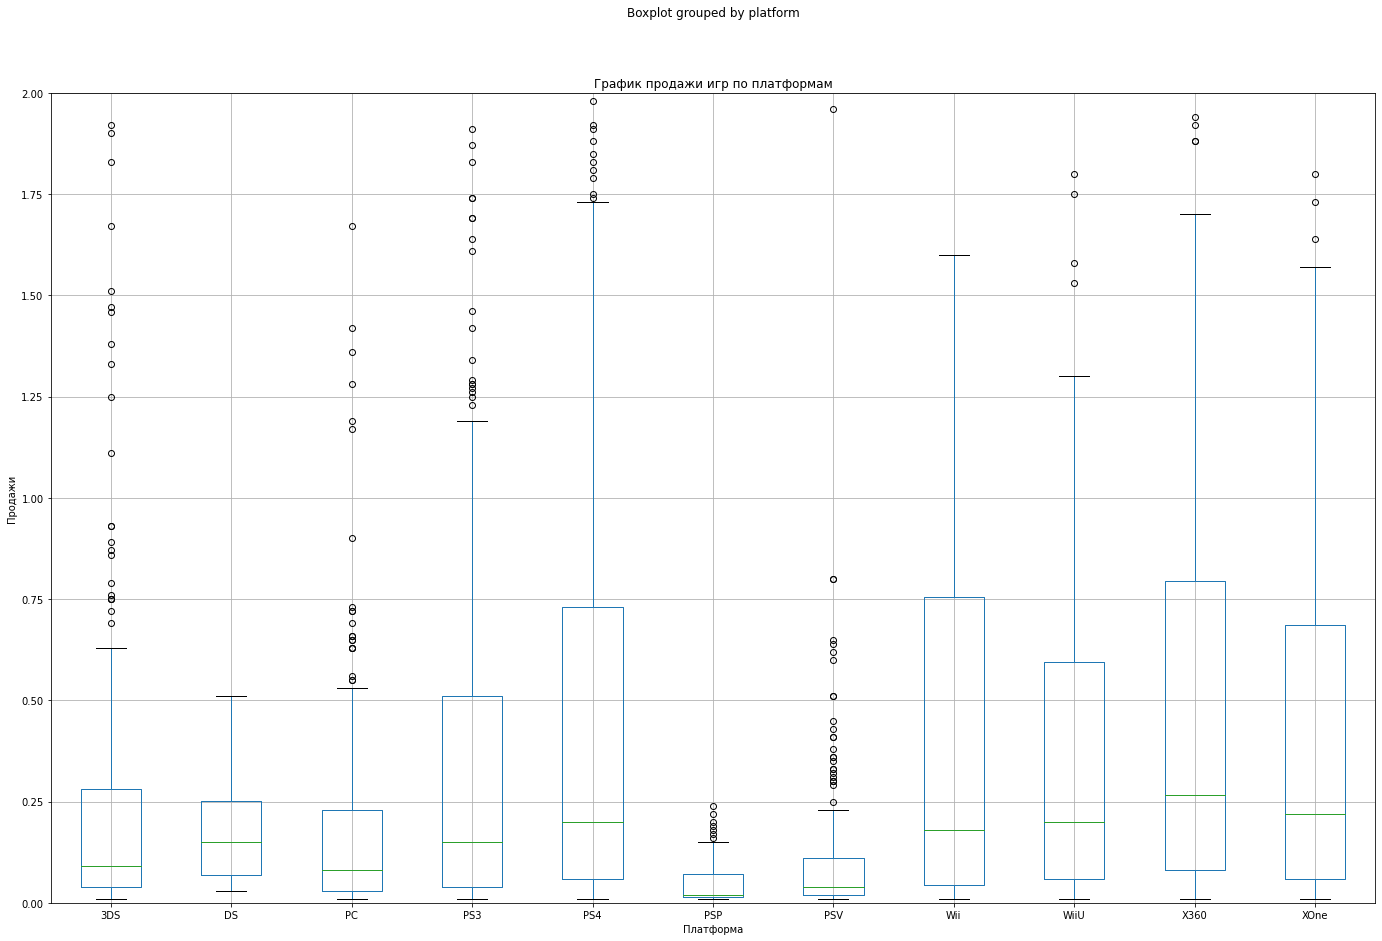

In [28]:
data_year_correct.boxplot(column=['total_sales'], by='platform', figsize=(23,15))
plt.ylim([0,2])
plt.title('График продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
None

Две развивающиеся платформы сильно конкурируют друг с другом.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

##### На 2015 год самая популярная платформа это PS4. Ей и займемся.

Вычислим корреляцию:

In [29]:
data_ps4 = data_year_correct.query('platform == "PS4"')

corr_user_ps4 = data_ps4['total_sales'].corr(data_ps4['user_score'])
corr_critic_ps4 = data_ps4['total_sales'].corr(data_ps4['critic_score'])

print('Зависимость продаж от оценки пользователей:', corr_user_ps4)
print('Зависимость продаж от оценки критиков:', corr_critic_ps4)

Зависимость продаж от оценки пользователей: -0.03195711020455643
Зависимость продаж от оценки критиков: 0.4065679020617816


Получается продажи не зависят от оценок пользователей, а вот зависимость от оценок критиков хоть и слабая, но наблюдается.

##### Посмотрим на графики:

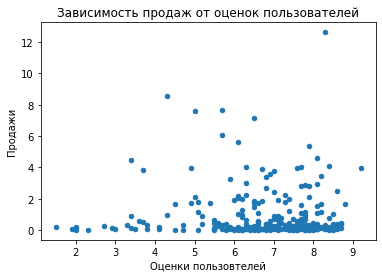

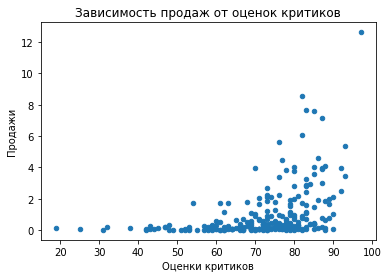

In [30]:
data_ps4.plot(x=['user_score'], y=['total_sales'], kind='scatter')
plt.xlabel('Оценки пользовтелей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценок пользователей')

data_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценок критиков')
None

Некоторые пользователи PS4 перед покупкой прислушиваются к критикам, но абсолютно все не прислушиваются к таким же как они пользователям.

#### Посмотрим на другие популярные платформы

Посмотрим на Top-5 платформ за выбранный период

Зависимость продаж от оценки пользователей по платформе PS4 составляет: -0.03195711020455643
Зависимость продаж от оценки критиковпо платформе PS4 составляет: 0.4065679020617816



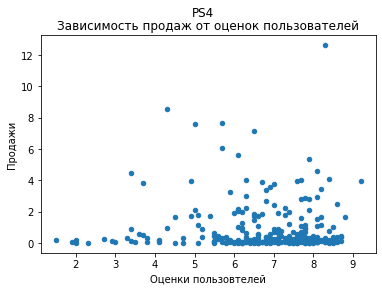

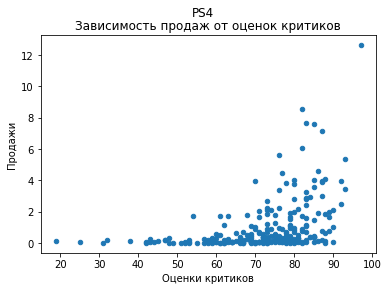

Зависимость продаж от оценки пользователей по платформе PS3 составляет: 0.0023944027357566907
Зависимость продаж от оценки критиковпо платформе PS3 составляет: 0.3342853393371919



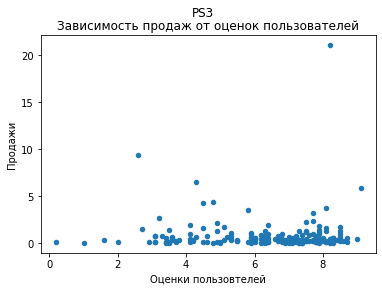

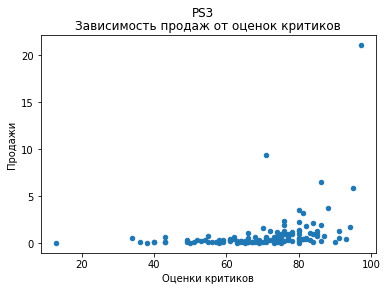

Зависимость продаж от оценки пользователей по платформе XOne составляет: -0.06892505328279415
Зависимость продаж от оценки критиковпо платформе XOne составляет: 0.41699832800840164



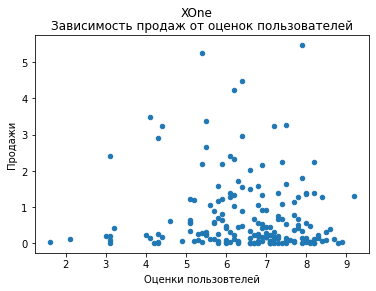

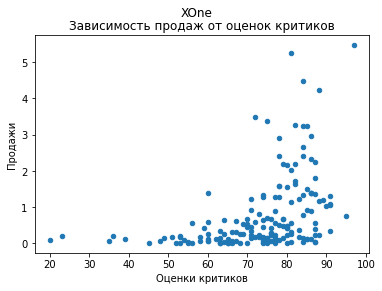

Зависимость продаж от оценки пользователей по платформе 3DS составляет: 0.24150411773563016
Зависимость продаж от оценки критиковпо платформе 3DS составляет: 0.35705661422881035



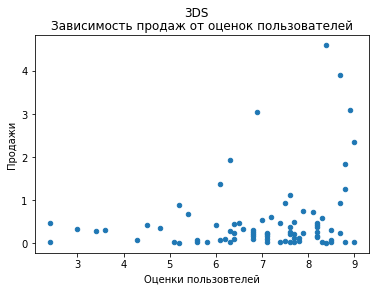

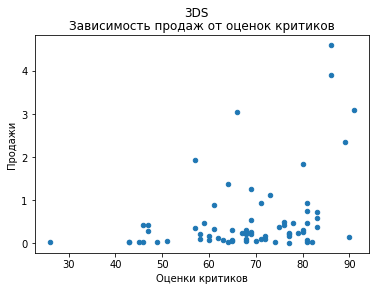

Зависимость продаж от оценки пользователей по платформе X360 составляет: -0.011742185147181351
Зависимость продаж от оценки критиковпо платформе X360 составляет: 0.3503445460228664



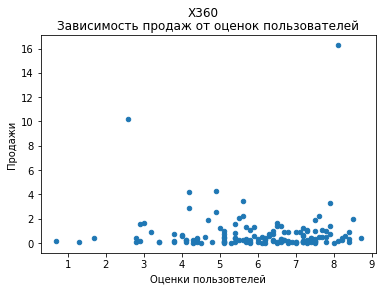

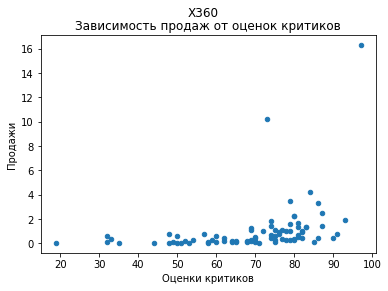

Зависимость продаж от оценки пользователей по платформе WiiU составляет: 0.4193304819266187
Зависимость продаж от оценки критиковпо платформе WiiU составляет: 0.3764149065423912



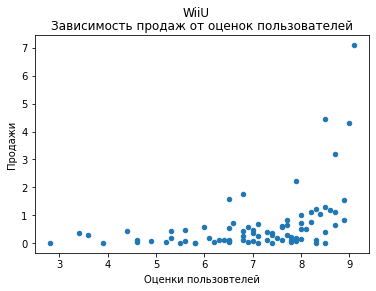

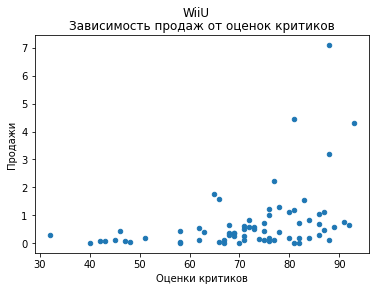

Зависимость продаж от оценки пользователей по платформе PC составляет: -0.09384186952476747
Зависимость продаж от оценки критиковпо платформе PC составляет: 0.1960302829436937



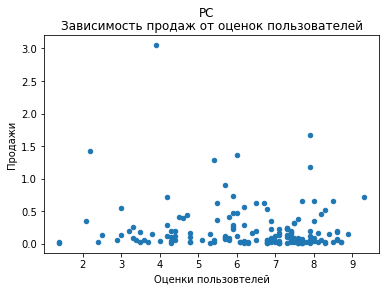

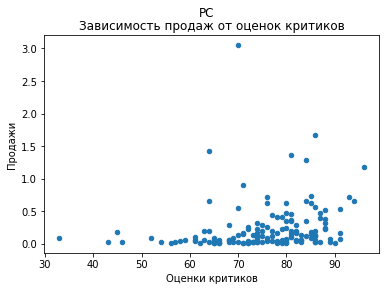

In [31]:
list_top_platform = data_year_correct.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:7]


for platf in list_top_platform:
    data_platf = data_year_correct[data_year_correct['platform'] == platf]

    corr_user_platf = data_platf['total_sales'].corr(data_platf['user_score'])
    corr_critic_platf = data_platf['total_sales'].corr(data_platf['critic_score'])

    print('Зависимость продаж от оценки пользователей по платформе', platf,'составляет:', corr_user_platf)
    print('Зависимость продаж от оценки критиковпо платформе', platf,'составляет:', corr_critic_platf)
    print()

    data_platf.plot(x=['user_score'], y=['total_sales'], kind='scatter')
    plt.xlabel('Оценки пользовтелей')
    plt.ylabel('Продажи')
    plt.title('Зависимость продаж от оценок пользователей')
    plt.suptitle(platf)

    data_platf.plot(x='critic_score', y='total_sales', kind='scatter')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.title('Зависимость продаж от оценок критиков')
    plt.suptitle(platf)
    None
    plt.show()

##### Вывод можно сделать такой, что покупатели прислушиваются к оценкам критиков, но не прислушиваются к оценкам пользователей.
Кроме двух платформ: на WiiU покупатели чуть больше прислушиваются к оценкам пользователей чем критиков, а на PC можно сказать, что покупатели вообще не прислушиваются ни к чьим оценкам. 

#### Посмотрим на общее распределение игр по жанрам.

##### Общее распределение по жанрам

In [32]:
data_genre = data_year_correct.groupby(['genre'])['name'].count().sort_values(ascending=False)
data_genre

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

По количеству данных у нас больше всего жанров Action и Sports.

##### Найдем жанры, которые принесли больше всего прибыли

In [33]:
data_genre_sales = data_year_correct.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)
print(data_genre_sales)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


##### А теперь найдем самые прибыльные жанры

In [34]:
data_genre_ratio = data_genre_sales / data_genre
data_genre_ratio.sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
dtype: float64

Как мы видим, самыми прибыльными жанрами являются Shooter, Sports и Platform.

### Шаг 4. Составим портрет пользователя каждого региона

##### Разделим пользователей по регионам

In [35]:
data_na = data_year_correct.query('na_sales != 0').loc[:, ~data_year_correct.columns.isin(['eu_sales', 'jp_sales', 'other_sales'])]

data_eu = data_year_correct.query('eu_sales != 0').loc[:, ~data_year_correct.columns.isin(['na_sales', 'jp_sales', 'other_sales'])]

data_jp = data_year_correct.query('jp_sales != 0').loc[:, ~data_year_correct.columns.isin(['na_sales', 'eu_sales', 'other_sales'])]

#### Шаг 4.1. Определим Топ-5 платформ по регионам

In [36]:
print(data_na.groupby('platform')['name'].agg('count').sort_values(ascending=False) / data_na.groupby('platform')['name'].agg('count').sum() * 100)
print(data_eu.groupby('platform')['name'].agg('count').sort_values(ascending=False) / data_eu.groupby('platform')['name'].agg('count').sum() * 100)
print(data_jp.groupby('platform')['name'].agg('count').sort_values(ascending=False) / data_jp.groupby('platform')['name'].agg('count').sum() * 100)

platform
PS4     22.459893
XOne    17.341482
PS3     16.119175
X360    12.987013
3DS      9.090909
PSV      7.181054
WiiU     7.028266
PC       6.417112
Wii      1.069519
DS       0.305577
Name: name, dtype: float64
platform
PS4     20.393812
XOne    15.330520
PS3     14.908579
PC      13.150492
X360    11.884669
3DS      8.579466
PSV      6.751055
WiiU     6.751055
Wii      1.547117
DS       0.562588
PSP      0.140647
Name: name, dtype: float64
platform
PSV     26.621735
PS3     19.882056
3DS     19.797810
PS4     18.786858
PSP      5.560236
WiiU     4.802022
X360     2.611626
XOne     1.853412
Wii      0.084246
Name: name, dtype: float64


**Какие выводы отсюда можно сделать:**
1. Самая популярная платформа у пользователей в трех регионаз это PS2.
2. Видим также как во всех регионах набирает популярность PS3.
3. DS распространен только в NA и JP
4. X360 распространен только в NA и EU.
5. В NA более быстрый переход на новые версии PS.
6. Уникальные платформы видим во всех трех регионах: в Америке это Wii, в Европе это PC, в Японии это PSP.

#### Шаг 4.2. Определим Топ-5 жанров по регионам

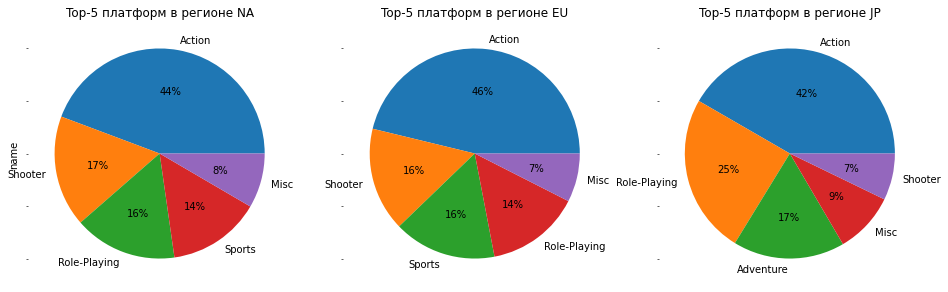

In [37]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(16,16), sharex=True, sharey=True)

data_na.groupby('genre')['name'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', ax=ax0)
ax0.set_title('Top-5 платформ в регионе NA')


data_eu.groupby('genre')['name'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', ax=ax1)
ax1.set_title('Top-5 платформ в регионе EU')


data_jp.groupby('genre')['name'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', ax=ax2)
ax2.set_title('Top-5 платформ в регионе JP')
None

Судя по графикам, можем сказать:
1. Жанровые предпочтения регионов NA и EU практически идентичные.
2. Во всех трех регионах более распространен жанр Action.
3. В Японии не любят гонки и стрелялки, зато любят приключения и ролевые игры.

#### Шаг 4.3. Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе? 


In [38]:
data_na_esrb = data_na.groupby('rating')['name'].agg('count').sort_values(ascending=False) / data_na.groupby('rating')['name'].agg('count').sum() * 100
data_eu_esrb = data_eu.groupby('rating')['name'].agg('count').sort_values(ascending=False) / data_eu.groupby('rating')['name'].agg('count').sum() * 100
data_jp_esrb = data_jp.groupby('rating')['name'].agg('count').sort_values(ascending=False) / data_jp.groupby('rating')['name'].agg('count').sum() * 100
display(data_na_esrb)
display(data_eu_esrb)
display(data_jp_esrb)

rating
M       33.036597
T       23.738872
E10+    21.760633
E       21.463897
Name: name, dtype: float64

rating
M       31.031308
E       24.401473
T       23.296501
E10+    21.270718
Name: name, dtype: float64

rating
T       38.105263
M       33.473684
E       16.210526
E10+    12.210526
Name: name, dtype: float64

Итак, в Северной Америке и Европе на первом месте игры с ограничением в 17 лет. А в Японии 13 лет, а уже потом идут игря для "по-старше". В Северной Америке на втором месте игру для 13 лет, а в Европе 6 лет.
1. «EC»   -> 3
2. «E»    -> 6
3. «E10+» -> 10
4. «T»    -> 13
5. «M»    -> 17
6. «AO»   -> 18 

### Шаг 5. Проверяем гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [39]:
data_user_xone = data_year_correct.query('platform == "XOne"').dropna()
data_user_pc = data_year_correct.query('platform == "PC"').dropna()

data_user_rating_xone = data_user_xone['user_score']
data_user_rating_pc = data_user_pc['user_score']

alpha = 0.05

results = st.ttest_ind(data_user_rating_xone, data_user_rating_pc, equal_var=False)

print("{:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

0.14104
Нет оснований отвергнуть нулевую гипотезу


Вывод такой, что у нас нет оснований отвергать нулевую гипотезу.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [40]:
data_user_action = data_year_correct.query('genre == "Action"').dropna()
data_user_sports = data_year_correct.query('genre == "Sports"').dropna()

data_user_rating_action = data_user_action['user_score']
data_user_rating_sports = data_user_sports['user_score']

alpha = 0.05

results = st.ttest_ind(data_user_rating_action, data_user_rating_sports, equal_var=False)

print("{:.25f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

0.0000000000007136312729063
Отвергаем нулевую гипотезу


Вывод такой, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

#### Выводы по раздеу:
Мы сформулировали нулевые и альтернативнуые гипотезы на основании генеральной совокупности для того, чтобы понять, соответствует ли наблюдаемая выборка нашему предположению о ней или скорее нет.<br>
Формулировка нулевой гипотезы звучит как средние пользовательские рейтинги жанров и платформ одинаковые, а в альтернативной мы отвергаем нулевую гипотезу.<br>
Критерий для проверки гипотез в данном случае выбран ttest_ind, так как именно этим тестом мы можем проверить средние значения двух выборок одной генеральной совокупности.

### Шаг 6. Общий вывод.

Итак, мы проанализировали данные по продажам компьютерных игр. Выполнили предобработку данных. Исправили названия столбцов, а также типы данных. Обработали значение "tbd" в оценках пользователей. Удалили неявные дубликаты по наименованию, жанру и платформе. Удалили строки с критичными пропусками. Сделали замену устаревшего рейтинг ESRB.<br>
Посчитали сумарные продажи игр по всем регионам.<br>
Выявили, что актуальный период для исследования это 2013-2016 года.<br>
Изучив данные по платформам и пришли к выводу, что актуальные платформы это PS4 и XOne, они на подъеме, тогда как остальные уже не актуальны или идут на спад. Средняя продолжительность жизни платформы 6 лет.<br>
Определили самые прибыльные жанры, это Platform, Shooter и Role-Playing, но самые продаваемые Action, Sports, Shooter<br>
На основании анализа также выявили, что покупатели прислушиваются к оценкам критиков, но не прислушиваются к оценкам пользователей.<br>

По рейтингу ESRB: в Северной Америке и Европе на первом месте игры с ограничением в 17 лет. А в Японии 13 лет, а уже потом идут игря для "по-старше". В Северной Америке на втором месте игру для 13 лет, а в Европе 6 лет.


Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, мы выявляли определяющие успешность игры закономерности: 
***Игры для PS4 и XOne в жанрах Action, Sports и Shooter, с высокими оценками критиков и рейтингом ESRB M и T***
